In [133]:
#import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
# load in files

az_hsip_funding = "./HSIP_Funding_Totals.csv"

accident_data = "./accident.csv"

In [135]:
#read and display the columns in each CSV

az_funding = pd.read_csv(az_hsip_funding)

az_funding.columns

Index(['YEAR', 'Reporting Period Begin Date', 'Reporting Period End Date',
       'Total Obligated Funding', 'Notes', 'Source'],
      dtype='object')

In [136]:
accidents = pd.read_csv(accident_data)

accidents.columns

Index(['index', 'accident_id', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
       'PERSONS', 'COUNTY', 'county_name', 'CITY', 'city_name', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'NHS', 'FUNC_SYS', 'func_sys_lit', 'ROAD_FNC',
       'road_fnc_lit', 'RD_OWNER', 'rd_owner_lit', 'TWAY_ID', 'TWAY_ID2',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'sp_jur_lit', 'HARM_EV',
       'harm_ev_lit', 'MAN_COLL', 'man_coll_lit', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'lgt_cond_lit',
       'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'cf1_lit',
       'cf2_lit', 'cf3_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DR

In [137]:
#determine total length of accidents dataset

len(accidents)

1860

In [138]:
#check to confirm that there aren't any duplicate accident IDs before counting total

accidents.groupby('accident_id').nunique()

#data shows 1860 rows of unique accident ID's, so no need to condense dataset to count total # of accidents

,index,ST_CASE,VE_TOTAL,VE_FORMS,PEDS,PERSONS,COUNTY,county_name,CITY,city_name,...,A_POLPUR,a_polour_lit,A_POSBAC,a_posbac_lit,A_DIST,a_dist_lit,A_DROWSY,a_drowsy_lit,INDIAN_RES,indian_res_lit
accident_id,,,,,,,,,,,,,,,,,,,,,
2012040001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012040002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012040003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012040004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012040005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016040872,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016040875,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016040876,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [159]:
#looking to compare the total # of accidents per year to the total increase/decrease in funding for HSIP. 

#create dataframe with only necessary columns
accident_by_year = accidents[['accident_id', 'DAY', 'MONTH', 'YEAR']].copy()

accident_by_year

,accident_id,DAY,MONTH,YEAR
0,2012040001,1,1,2012
1,2012040002,1,1,2012
2,2012040003,1,1,2012
3,2012040004,1,1,2012
4,2012040005,4,1,2012
...,...,...,...,...
1855,2016040872,30,12,2016
1856,2016040875,30,12,2016
1857,2016040876,31,12,2016
1858,2016040877,15,11,2016


In [164]:
#Find the total # of accidents per year from the accient data

year_df = accident_by_year.groupby('YEAR')['accident_id'].count().reset_index()

year_df.columns = ['YEAR', 'Total Accidents']

year_df

,YEAR,Total Accidents
0,2012,383
1,2013,383
2,2014,346
3,2015,356
4,2016,392


In [171]:
#convert the total obligated funding to a numeric value 

funding_df = pd.DataFrame(az_funding)

funding_df['Total Obligated Funding'] = funding_df['Total Obligated Funding'].astype(int)

In [172]:
#determine funding totals for HSIP from year to year

funding_totals = funding_df[['YEAR', 'Total Obligated Funding']].copy()

funding_totals_styled = funding_totals.style.format({'Total Obligated Funding': '{:,}'})

funding_totals_styled

,YEAR,Total Obligated Funding
0,2013,"25,993,917"
1,2014,"26,480,670"
2,2015,"77,314,960"
3,2016,"50,588,944"


Text(0, 0.5, 'Total Obligated Funding')

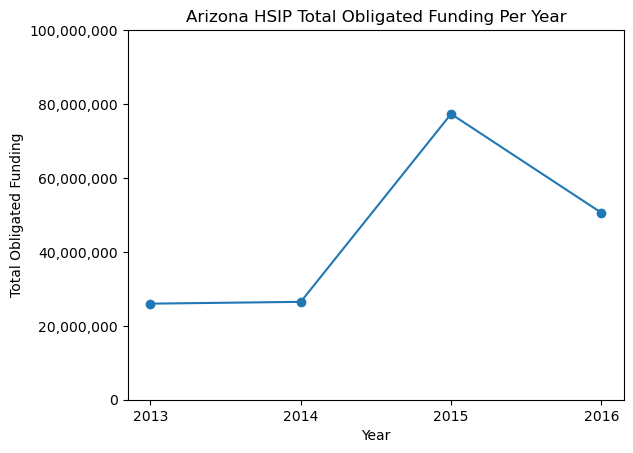

In [177]:
#create a line graph comparing funding for each year

x_value = funding_totals['YEAR']

y_value = funding_totals['Total Obligated Funding']



plt.plot(x_value, y_value, marker="o")
plt.ylim(0,100000000)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(ticks=x_value, labels=[int(year) for year in x_value])
plt.title('Arizona HSIP Total Obligated Funding Per Year')
plt.xlabel('Year')
plt.ylabel('Total Obligated Funding')

Text(0.5, 0, 'Year')

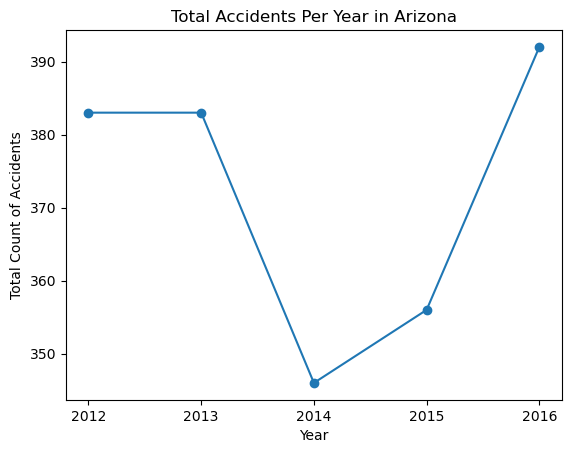

In [176]:
#create a line graph comparing the total # of accidents by year

x_value = year_df['YEAR']
y_value = year_df['Total Accidents']

plt.plot(x_value, y_value, marker = "o")
plt.xticks(ticks=x_value, labels=[int(year) for year in x_value])
plt.title('Total Accidents Per Year in Arizona')
plt.ylabel('Total Count of Accidents')
plt.xlabel('Year')

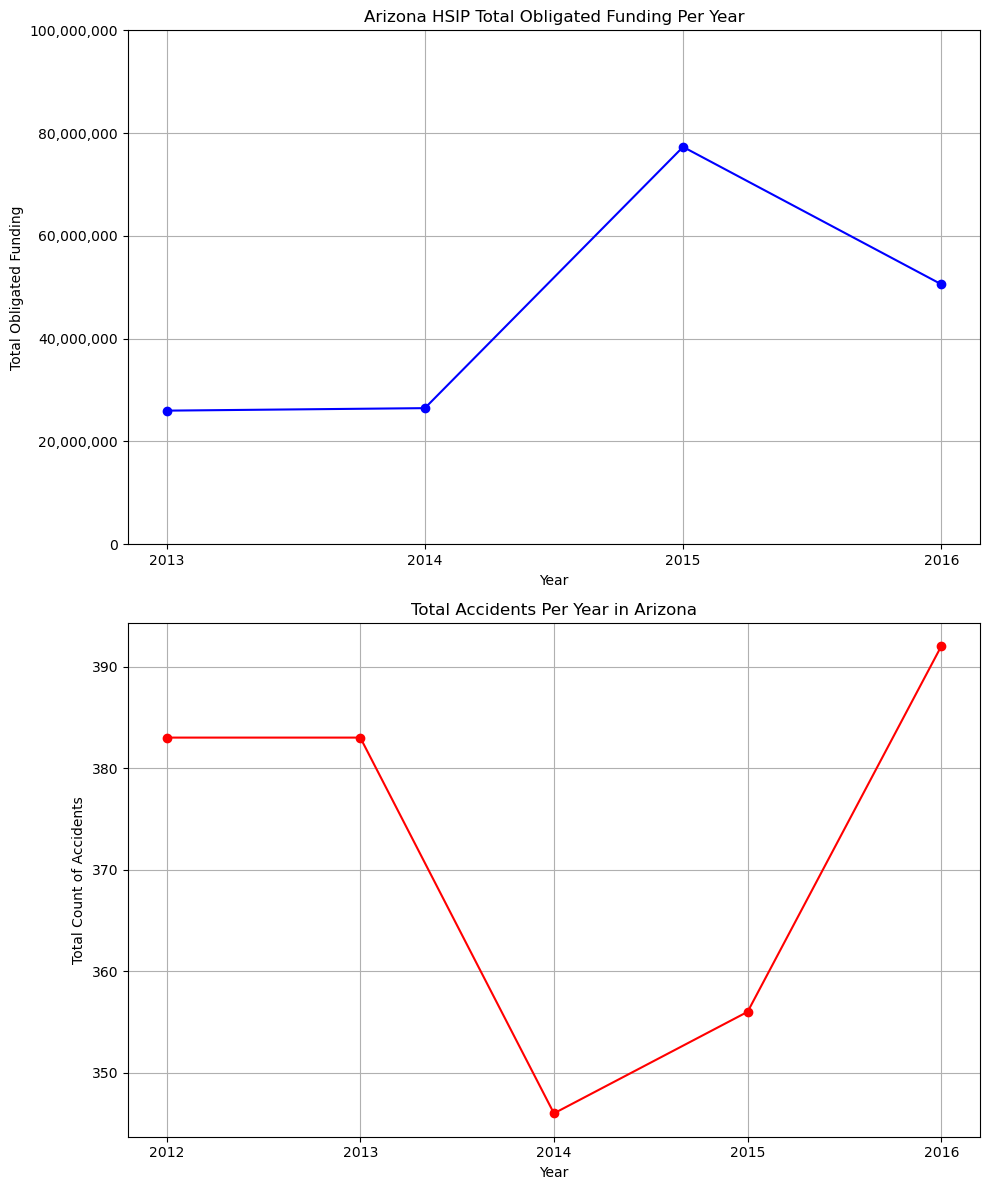

In [180]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# First subplot for funding
x_value_funding = funding_totals['YEAR']
y_value_funding = funding_totals['Total Obligated Funding']

axs[0].plot(x_value_funding, y_value_funding, marker="o", color='b')
axs[0].set_ylim(0, 100000000)
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
axs[0].set_xticks(x_value_funding)
axs[0].set_xticklabels([int(year) for year in x_value_funding])
axs[0].set_title('Arizona HSIP Total Obligated Funding Per Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Obligated Funding')
axs[0].grid(True)

# Second subplot for accidents
x_value_accidents = year_df['YEAR']
y_value_accidents = year_df['Total Accidents']

axs[1].plot(x_value_accidents, y_value_accidents, marker="o", color='r')
axs[1].set_xticks(x_value_accidents)
axs[1].set_xticklabels([int(year) for year in x_value_accidents])
axs[1].set_title('Total Accidents Per Year in Arizona')
axs[1].set_ylabel('Total Count of Accidents')
axs[1].set_xlabel('Year')
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()